# Importing and Loading the dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Dataset info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.shape

(614, 13)

# Data Cleaning

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

First we will fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [9]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [10]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

Now, Let's drop all the missing values remaining.

In [11]:
df.dropna(inplace=True)

# Let's check the Missing values for the final time!

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here, we have dropped all the missing values to avoid disturbances in the model. The Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

In [13]:
df.shape

(542, 13)

# Exploratory Data Analysis(EDA)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

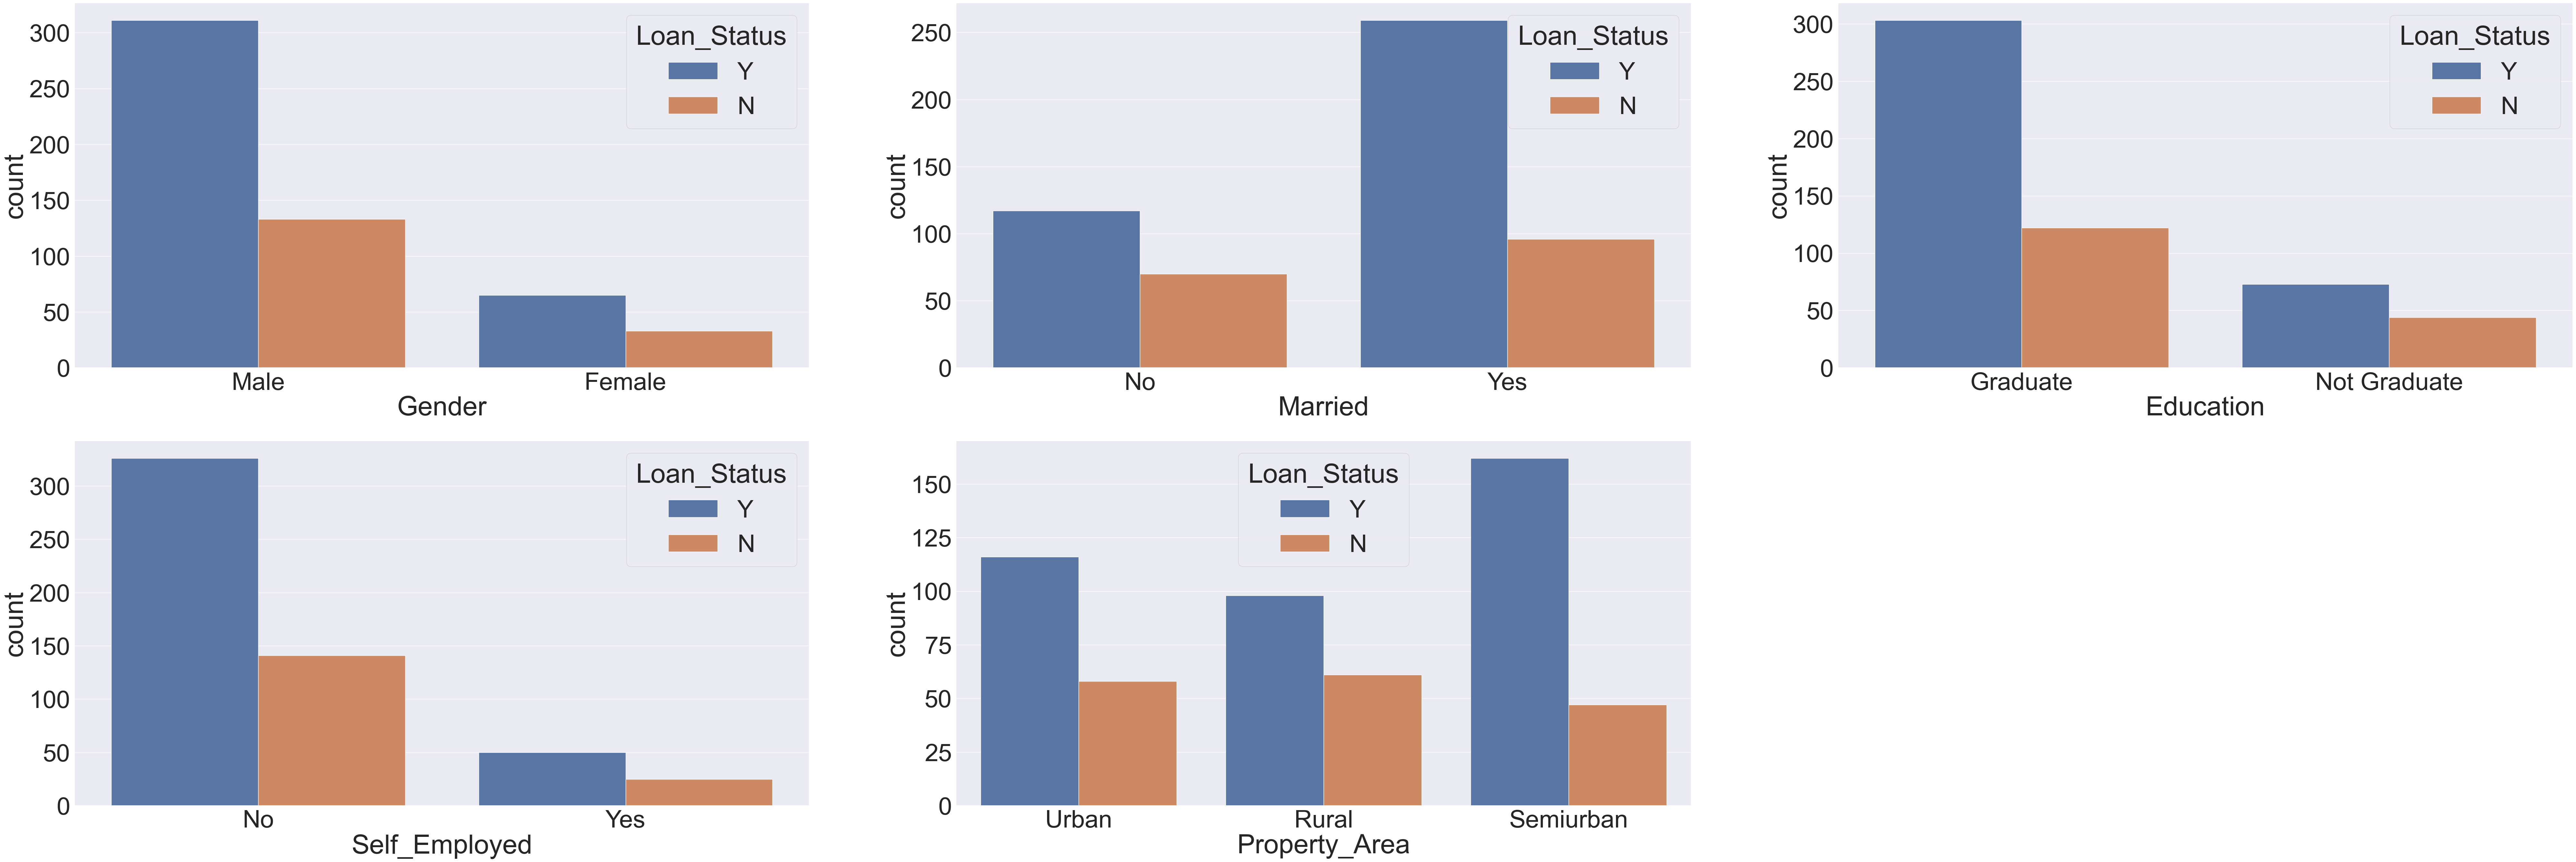

In [15]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(x='Gender', hue='Loan_Status', data=df)

plt.subplot(332)
sns.countplot(x='Married', hue='Loan_Status', data=df)

plt.subplot(333)
sns.countplot(x='Education', hue='Loan_Status', data=df)

plt.subplot(334)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

plt.subplot(335)
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

plt.show()

Let's replace the Variable values to Numerical form & display the Value Counts
The data in Numerical form avoids disturbances in building the model.

In [16]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [17]:
df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [18]:
df['Gender'].value_counts()

Gender
Male      444
Female     98
Name: count, dtype: int64

In [19]:
df['Married'].value_counts()

Married
Yes    355
No     187
Name: count, dtype: int64

In [20]:
df['Dependents'].value_counts()

Dependents
0     309
1      94
2      94
3+     45
Name: count, dtype: int64

In [21]:
df['Education'].value_counts()

Education
Graduate        425
Not Graduate    117
Name: count, dtype: int64

In [22]:
df['Self_Employed'].value_counts()

Self_Employed
No     467
Yes     75
Name: count, dtype: int64

In [23]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    209
Urban        174
Rural        159
Name: count, dtype: int64

In [24]:
df['LoanAmount'].value_counts()

LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 195, dtype: int64

In [25]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [26]:
df['Credit_History'].value_counts()

Credit_History
1.0    468
0.0     74
Name: count, dtype: int64

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

# Final DataFrame

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


# Importing Packages for Classification algorithms

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into Train and Test set

In [32]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression (LR)
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection eon.png

In [35]:
# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X)

In [36]:

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [39]:
# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.42      0.54        33
           1       0.79      0.93      0.86        76

    accuracy                           0.78       109
   macro avg       0.76      0.68      0.70       109
weighted avg       0.77      0.78      0.76       109



In [42]:
print("y_predicted",y_pred)
print("y_test",y_test)

y_predicted [0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1]
y_test 409    0
83     0
402    1
97     1
270    1
      ..
172    0
55     1
106    1
556    1
606    1
Name: Loan_Status, Length: 109, dtype: int64
